### Dependence of the growth rate on the RF voltage in the presence of phase noise.
Plot the emittance growth in the presence of phase for different values of the RF voltage. The normalised emittance is used here.  

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

### Plotting parameters

In [4]:
params = {'legend.fontsize': 20,
          'figure.figsize': (8.5, 7),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### 1) Load the data
a) Give the paths to the data in /afs/.

b) Load the values of the transverse emittance in a dictionary.

In [13]:
Vrf_list = ['1', '1_5', '2', '2_5', '3'] # list of the RF voltages studied
Vrf_list_for_legend = [1, 1.5, 2, 2.5, 3]
turns = 3e5 
f_rev = 43375.86 # [Hz] The revolution frequency of the machine 

In [7]:
path_to_data = '/afs/cern.ch/work/n/natriant/private/sixtracklib_example_crabcavity/output/'
study_name_template = 'tbt_SPS_noCC_phase_noise1e-8_20kNb_3e5turns_VRF_'

#### 2) Plot evolution of the V (vertical emittance) emittance

In [8]:
turns_list = np.arange(0,turns)
time = turns_list/f_rev # [s], type: list

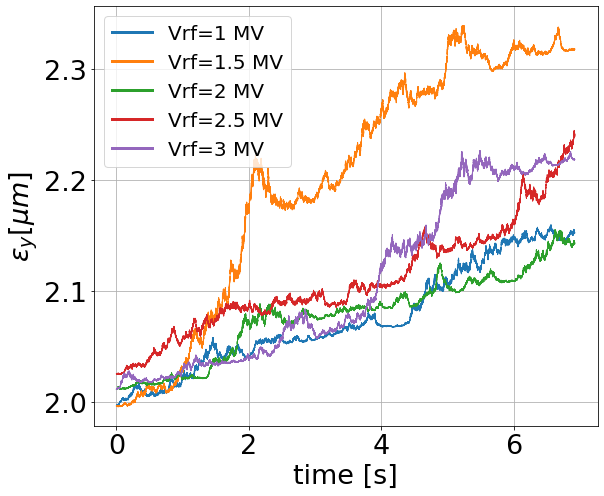

In [16]:
for index, Vrf in enumerate(Vrf_list):
    temp_name = '{}MV'.format(Vrf) # the suffix of the name of the current study
    my_dict = pickle.load( open( path_to_data+study_name_template+temp_name+'.pkl', "rb" ) )
    
    plt.plot(time, np.array(my_dict['neps_y'])*1e6, c='C{}'.format(index))
    plt.plot(2,2,  label = 'Vrf={} MV'.format(Vrf_list_for_legend[index]), c='C{}'.format(index), linewidth = 3) 
    plt.xlabel('time [s]')
    plt.ylabel(r'$\epsilon_y [\mu m]$')
    plt.legend(loc=0)
plt.grid()    
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('ey_growth_270GeV_SPS_noCC_PN1e-8_ScanVRF_20kNb_3e5turns_1run.png')